In [1]:
%matplotlib inline

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


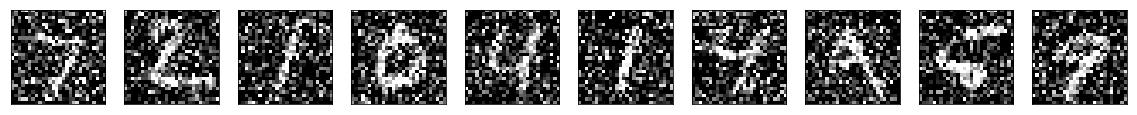

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# get training and test samples from mnist
(x_train,_),(x_test,_) = mnist.load_data()

# standardize the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# current training sample is 60k x 28 x 28
# and test sample size is 10k x 28 x 28

# add another dimension
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

# add some noise to both train and test data
noisy_factor = 0.5
x_train_noisy = x_train + noisy_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noisy_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# keep noisy data between 0 and 1 ?
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# plot noisy data
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
x_train_noisy.shape

(60000, 28, 28, 1)

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
input_img = Input(shape=(28,28,1))

x = Conv2D(32,(3,3),activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=1, batch_size=128, shuffle=True, validation_data=(x_test_noisy,x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder',write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1


In [1]:
x_test_noisy.shape

NameError: name 'x_test_noisy' is not defined

In [5]:
test_this = np.reshape(x_test_noisy[1],(1,28,28,1))

In [6]:
x_test_noisy[1].shape

(28, 28, 1)

In [7]:
result = autoencoder.predict(test_this)

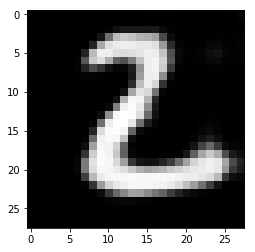

In [8]:
plt.imshow(result[0].reshape(28,28))
plt.gray()
plt.show()